<a href="https://colab.research.google.com/github/Uzmamushtaque/CSCI4962-Projects-ML-AI/blob/main/Lecture_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 15

# Today's Lecture

1. Radial Basis Function Networks (RBFNs)
2. When to use RBFNs
3. Training an RBF Network

# Introduction

An RBFN performs classification by measuring the input’s similarity to examples from the training set. Each RBFN neuron stores a “prototype”, which is just one of the examples from the training set. When we want to classify a new input, each neuron computes the Euclidean distance between the input and its prototype.If the input more closely resembles the class A prototypes than the class B prototypes, it is classified as class A.

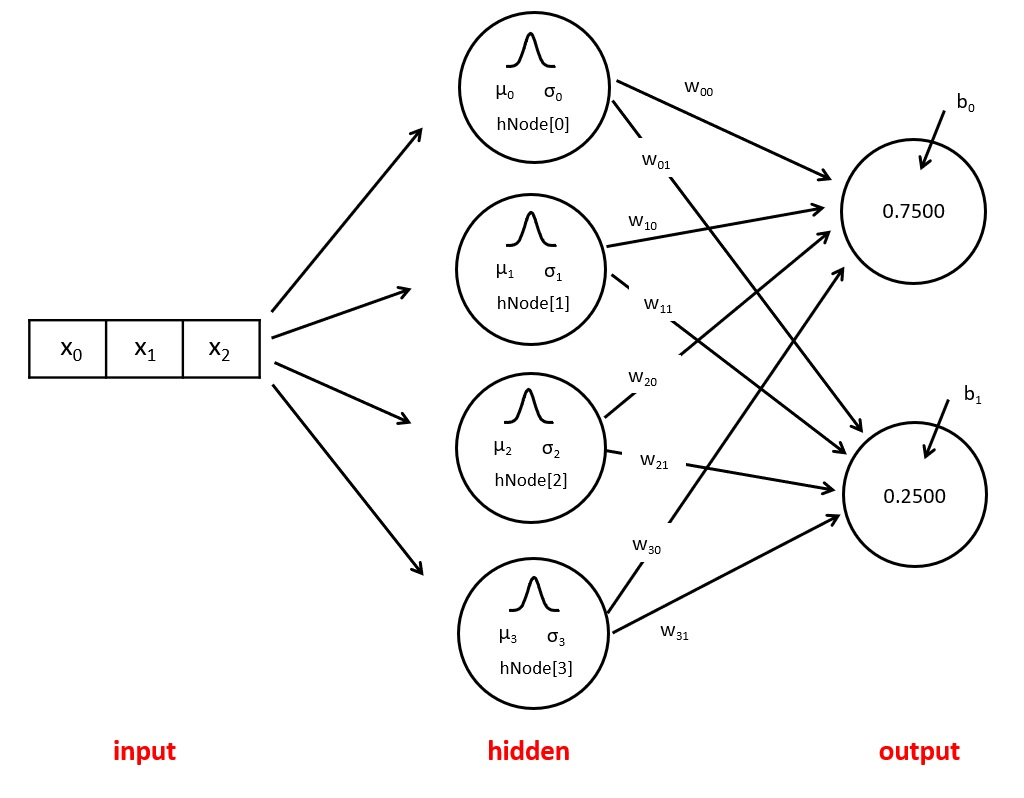

# References/Readings

[Article 1](https://mccormickml.com/2013/08/15/radial-basis-function-network-rbfn-tutorial/)